# Random Forest

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

# Read the CSV

In [2]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

(284807, 31)

# Data Cleaning¶
Checking to see if there are any null values in the dataset.

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

It could be seen that there are no null values in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


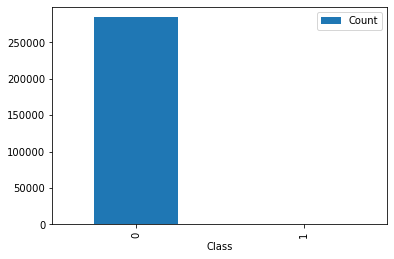

In [5]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284807 transactions, which is a mere 0.17%.

# Defining features

Defining the predictor features and the target feature.

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [8]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split¶

Using Class for the y values (target feature)

In [9]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [11]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Random Forest Classifier Model¶

### Train the Model

In [12]:
randomTreeModel = RandomForestClassifier(n_estimators=200)
randomTreeModel

RandomForestClassifier(n_estimators=200)

In [13]:
randomTreeModel.fit(X_train_scaled, y_train.flatten())

RandomForestClassifier(n_estimators=200)

In [14]:
print(f"Training Data Score: {randomTreeModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {randomTreeModel.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9995646189713772


In [15]:
# Make predictions with the model
randomTreePredictions = randomTreeModel.predict(X_test_scaled)

In [16]:
randomTreePredictProba = randomTreeModel.predict_proba(X_test_scaled)[:,1]

Random Forest Classifier
Accuracy:  0.9995646189713772
Precision:  0.9270833333333334
Recall:  0.7876106194690266
F1-Score:  0.8516746411483254
AUC score:  0.8937560756757982
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.93      0.79      0.85       113

      accuracy                           1.00     71202
     macro avg       0.96      0.89      0.93     71202
  weighted avg       1.00      1.00      1.00     71202



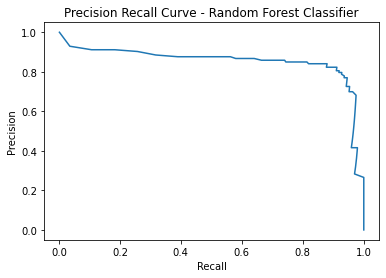

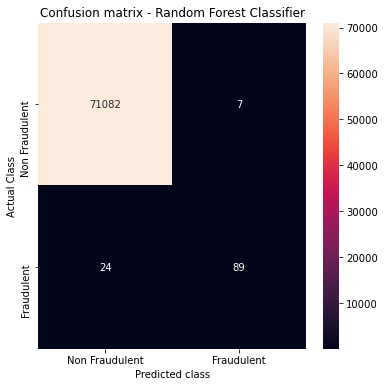

In [17]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), randomTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomTreePredictions))
print(classification_report(y_test.flatten(), randomTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), randomTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusionMatrix = confusion_matrix(y_test.flatten(), randomTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Hyperparameter Tuning¶
Use GridSearchCV to tune the model's parameters

In [18]:
randomTreeModel.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [27]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
randomTreeParamGrid = {'n_estimators': [100, 200],
                       'criterion': ['gini','entropy'],
                       'max_features': ['auto','sqrt','log2',None],
                      }
randomTreeGrid = GridSearchCV(randomTreeModel, randomTreeParamGrid, verbose=3)

In [28]:
# Train the model with GridSearch
randomTreeGrid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, max_features=auto, n_estimators=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=auto, n_estimators=100, score=1.000, total= 1.9min
[CV] criterion=gini, max_features=auto, n_estimators=100 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=100, score=1.000, total= 2.0min
[CV] criterion=gini, max_features=auto, n_estimators=100 .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=100, score=0.999, total= 2.2min
[CV] criterion=gini, max_features=auto, n_estimators=100 .............
[CV]  criterion=gini, max_features=auto, n_estimators=100, score=1.000, total= 2.4min
[CV] criterion=gini, max_features=auto, n_estimators=100 .............
[CV]  criterion=gini, max_features=auto, n_estimators=100, score=1.000, total= 2.2min
[CV] criterion=gini, max_features=auto, n_estimators=200 .............
[CV]  criterion=gini, max_features=auto, n_estimators=200, score=1.000, total= 4.3min
[CV] criterion=gini, max_features=auto, n_estimators=200 .............
[CV]  criterion=gini, max_features=auto, n_estimators=200, score=0.999, total= 4.1min
[CV] criterion=gini, max_features=auto, n_estimators=200 .............
[CV]  criterion=gini, max_features=auto, n_estimators=200, score=0.999, total= 4.0min
[CV] criterion=gini, max_features=auto, n_estimators=200 .............
[CV]  criterion=gini, max_features=auto, n_estimators=200,

[CV]  criterion=entropy, max_features=sqrt, n_estimators=100, score=1.000, total= 1.2min
[CV] criterion=entropy, max_features=sqrt, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=200, score=1.000, total= 2.5min
[CV] criterion=entropy, max_features=sqrt, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=200, score=0.999, total= 2.4min
[CV] criterion=entropy, max_features=sqrt, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=200, score=1.000, total= 2.4min
[CV] criterion=entropy, max_features=sqrt, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=200, score=1.000, total= 2.6min
[CV] criterion=entropy, max_features=sqrt, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=200, score=1.000, total= 2.4min
[CV] criterion=entropy, max_features=log2, n_estimators=100 ..........
[CV]  criterion=entropy, max_features=lo

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 370.0min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             verbose=3)

In [29]:
print(randomTreeGrid.best_params_)
print(randomTreeGrid.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}
0.9995552538564171


In [32]:
# Make predictions with the hyperparameter tuned model
randomTreeGridPredictions = randomTreeGrid.predict(X_test_scaled)
randomTreeGridPredictProba = randomTreeGrid.predict_proba(X_test_scaled)[:,1]

In [33]:
# Print classification report
print(classification_report(y_test.flatten(), randomTreeGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.95      0.78      0.85       113

      accuracy                           1.00     71202
     macro avg       0.97      0.89      0.93     71202
  weighted avg       1.00      1.00      1.00     71202



Random Forest Classifier
Accuracy:  0.9995786635206876
Precision:  0.946236559139785
Recall:  0.7787610619469026
F1-Score:  0.854368932038835
AUC score:  0.8893453637886547
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.95      0.78      0.85       113

      accuracy                           1.00     71202
     macro avg       0.97      0.89      0.93     71202
  weighted avg       1.00      1.00      1.00     71202



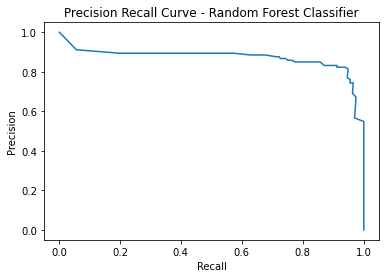

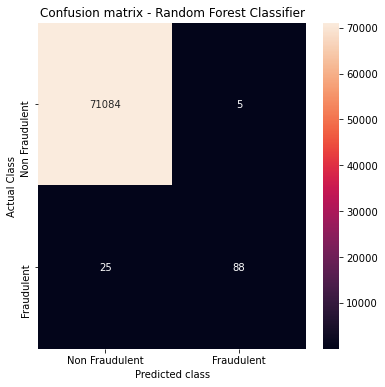

In [34]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomTreeGridPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomTreeGridPredictions))
print("Recall: ",recall_score(y_test.flatten(), randomTreeGridPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomTreeGridPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomTreeGridPredictions))
print(classification_report(y_test.flatten(), randomTreeGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), randomTreeGridPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusionMatrix = confusion_matrix(y_test.flatten(), randomTreeGridPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Feature Selection

In [36]:
feature_names = selected_features.columns
sorted(zip(randomTreeModel.feature_importances_, feature_names), reverse=True)

[(0.2107178941150608, 'V17'),
 (0.12041150081095829, 'V12'),
 (0.11522489887145057, 'V14'),
 (0.08181395015930679, 'V10'),
 (0.0661349452097022, 'V11'),
 (0.060614265248656596, 'V16'),
 (0.030009283652137314, 'V9'),
 (0.027118166398424827, 'V4'),
 (0.025099915495132387, 'V7'),
 (0.023995196282617, 'V18'),
 (0.016429713999359382, 'V26'),
 (0.01607087437012219, 'V3'),
 (0.015365843621133593, 'V1'),
 (0.014838171473302847, 'V5'),
 (0.013950776249500698, 'V21'),
 (0.013120374336278308, 'V6'),
 (0.012531685785787594, 'V19'),
 (0.012282927388736901, 'V2'),
 (0.012183961064436165, 'V15'),
 (0.012054839858392683, 'V8'),
 (0.012018667536457245, 'V20'),
 (0.011244456106992335, 'V27'),
 (0.010768415236565613, 'V28'),
 (0.01030474131344009, 'Amount'),
 (0.010293801677358948, 'V24'),
 (0.010249141733258077, 'V13'),
 (0.010240854782277724, 'Time'),
 (0.009032896917317868, 'V22'),
 (0.008368911508760063, 'V25'),
 (0.007508928797075038, 'V23')]

# Choosing Top features

In [37]:
# Set top features. This will be used as x values.
top_features = df[[ 
'V17',
'V14',
'V12',
'V10',
'V11',
'V16',
'V9',
]]

top_features.head(1)

,V17,V14,V12,V10,V11,V16,V9
0,0.207971,-0.311169,-0.617801,0.090794,-0.5516,-0.470401,0.363787


# Create a Train Test Split¶
Use Class for the y values

In [38]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

top_X = top_features
top_y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", top_X.shape, top_y.shape)

Shape:  (284807, 7) (284807, 1)


In [39]:
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_X, top_y, random_state=42)

In [40]:
print(top_X_train.shape,top_X_test.shape,top_y_train.shape, top_y_test.shape)

(213605, 7) (71202, 7) (213605, 1) (71202, 1)


# Pre-processing
Scale the data using the MinMaxScaler

In [41]:
top_X_minmax = MinMaxScaler().fit(top_X_train)

top_X_train_scaled = top_X_minmax.transform(top_X_train)
top_X_test_scaled = top_X_minmax.transform(top_X_test)

In [42]:
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaler = X_scaler.transform(X_train)
X_test_scaler = X_scaler.transform(X_test)

# Random Forest Model with Top features¶

### Train the Model

In [44]:
top_randomTreeModel = RandomForestClassifier()
top_randomTreeModel

RandomForestClassifier()

In [45]:
top_randomTreeModel.fit(top_X_train_scaled, top_y_train.flatten())

RandomForestClassifier()

In [47]:
# Make predictions
top_randomTreePredictions = top_randomTreeModel.predict(top_X_test_scaled)

In [48]:
top_randomTreePredictProba = top_randomTreeModel.predict_proba(top_X_test_scaled)[:,1]

In [49]:
print(classification_report(top_y_test.flatten(), top_randomTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(top_y_test.flatten(), top_randomTreePredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.91      0.79      0.84       113

      accuracy                           1.00     71202
     macro avg       0.95      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9995365298727564


Random Forest Classifier
Accuracy:  0.9995365298727564
Precision:  0.9081632653061225
Recall:  0.7876106194690266
F1-Score:  0.8436018957345971
AUC score:  0.8937420088018796
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.91      0.79      0.84       113

      accuracy                           1.00     71202
     macro avg       0.95      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



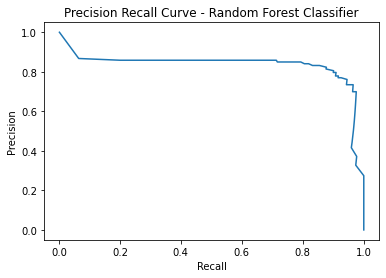

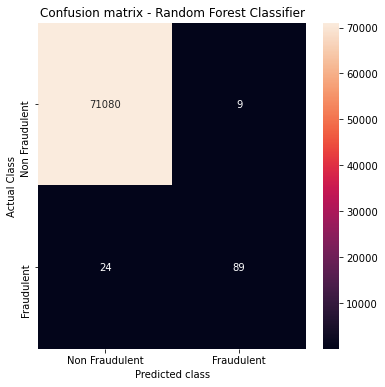

In [73]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), top_randomTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), top_randomTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), top_randomTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), top_randomTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), top_randomTreePredictions))
print(classification_report(y_test.flatten(), top_randomTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), top_randomTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), top_randomTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [51]:
top_randomTreeModel.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [53]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
top_randomTreeParamGrid = {'n_estimators': [100, 200],
                           'criterion': ['gini','entropy'],
                           'class_weight': ["balanced","balanced_subsample", None],
                           'max_features': ['auto','sqrt','log2',None],
                          }
top_randomTreeGrid = GridSearchCV(top_randomTreeModel, top_randomTreeParamGrid, verbose=3)

In [54]:
# Train the model with GridSearch
top_randomTreeGrid.fit(top_X_train_scaled, top_y_train.flatten())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=1.000, total=  24.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.4s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=0.999, total=  25.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.9s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=0.999, total=  25.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=1.000, total=  25.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=0.999, total=  24.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total=  49.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, score=0.999, total=  51.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_f

[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200, score=1.000, total= 1.0min
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200, score=0.999, total= 1.0min
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200, score=0.999, total= 1.0min
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200, score=1.000, total= 1.1min
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=200, score=1.000, total= 1.0min
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=b

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=200, score=0.999, total=  55.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total=  59.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total=  55.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=100, score=1.000, total=  29.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=100, score=1.000, total=  28.2s
[CV] class_weight=balanced_subsample, cri

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, score=0.999, total= 1.1min
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, score=0.999, total= 1.1min
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, score=1.000, total= 1.2min
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, score=1.000, total= 1.1min
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=100, score=1.000, total=  33.7s
[CV] class_wei

[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total= 1.4min
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total= 1.4min
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=0.999, total= 1.4min
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total= 1.5min
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total= 1.4min
[CV] class_weight=None, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  class_weight=None, criterion=gini, max_features=sqrt, n_estimators=100, score=1.000,

[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100, score=1.000, total=  39.8s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100, score=1.000, total=  37.6s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.999, total=  39.6s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.999, total=  41.4s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=100, score=1.000, total=  37.1s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=None, criterion=entropy, max_features=sqr

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 302.9min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             verbose=3)

In [55]:
print(top_randomTreeGrid.best_params_)
print(top_randomTreeGrid.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}
0.9995505723180637


In [56]:
# Make predictions with the hyperparameter tuned model
top_randomTreeGridPredictions = top_randomTreeGrid.predict(top_X_test_scaled)

In [57]:
print(classification_report(top_y_test.flatten(), top_randomTreeGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.90      0.79      0.84       113

      accuracy                           1.00     71202
     macro avg       0.95      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



In [61]:
top_hypertunedrandomTreeModel = RandomForestClassifier(criterion = 'entropy', 
                                                       max_features = 'sqrt', 
                                                       n_estimators = 200, 
                                                       class_weight = None)
top_hypertunedrandomTreeModel

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=200)

In [62]:
top_hypertunedrandomTreeModel.fit(top_X_train_scaled, top_y_train.flatten())

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=200)

In [63]:
print(f"Training Data Score: {top_hypertunedrandomTreeModel.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_hypertunedrandomTreeModel.score(top_X_test_scaled, top_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9995365298727564


In [64]:
top_hypertunedrandomTreeModelPredictions = top_hypertunedrandomTreeModel.predict(top_X_test_scaled)

In [65]:
top_hypertunedrandomTreeModelPredictProba = top_hypertunedrandomTreeModel.predict_proba(top_X_test_scaled)[:,1]

In [66]:
print(classification_report(top_y_test.flatten(), top_hypertunedrandomTreeModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.91      0.79      0.84       113

      accuracy                           1.00     71202
     macro avg       0.95      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



Random Forest Classifier
Accuracy:  0.9995365298727564
Precision:  0.9081632653061225
Recall:  0.7876106194690266
F1-Score:  0.8436018957345971
AUC score:  0.8937420088018796
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.91      0.79      0.84       113

      accuracy                           1.00     71202
     macro avg       0.95      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



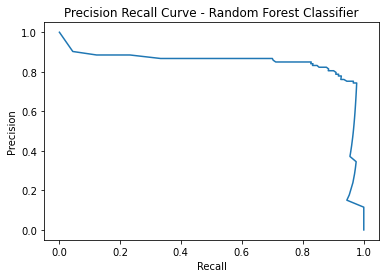

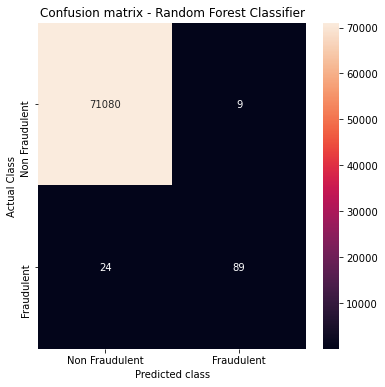

In [67]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), top_hypertunedrandomTreeModelPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), top_hypertunedrandomTreeModelPredictions))
print("Recall: ",recall_score(y_test.flatten(), top_hypertunedrandomTreeModelPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), top_hypertunedrandomTreeModelPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), top_hypertunedrandomTreeModelPredictions))
print(classification_report(y_test.flatten(), top_hypertunedrandomTreeModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), top_hypertunedrandomTreeModelPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusionMatrix = confusion_matrix(y_test.flatten(), top_hypertunedrandomTreeModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

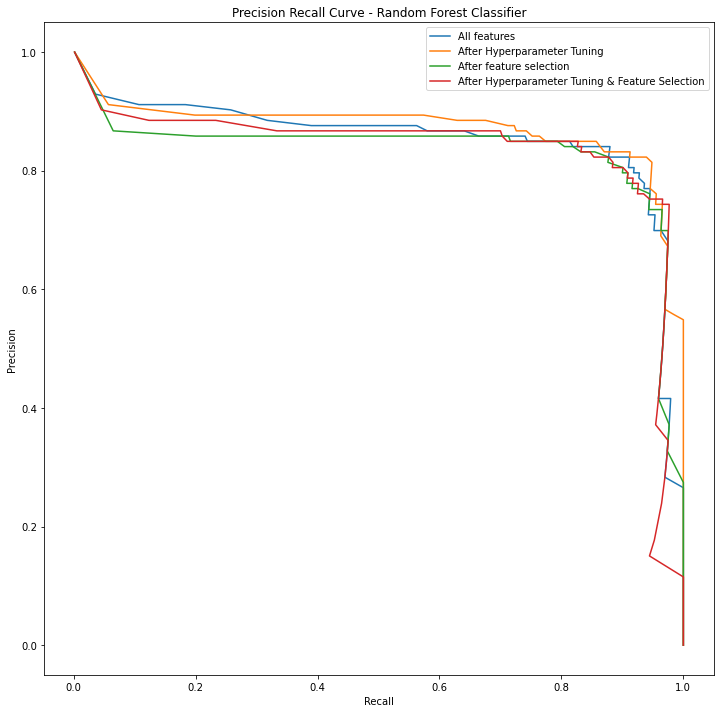

In [72]:
plt.figure(figsize =(12, 12)) 
p, r, t = precision_recall_curve(y_test.flatten(), randomTreePredictProba)
plt.plot(p, r, label="All features")
p, r, t = precision_recall_curve(y_test.flatten(), randomTreeGridPredictProba)
plt.plot(p, r, label="After Hyperparameter Tuning")
p, r, t = precision_recall_curve(y_test.flatten(), top_randomTreePredictProba)
plt.plot(p, r, label="After feature selection")
p, r, t = precision_recall_curve(y_test.flatten(), top_hypertunedrandomTreeModelPredictProba)
plt.plot(p, r, label="After Hyperparameter Tuning & Feature Selection")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
plt.legend()
plt.show()

# Save the Model¶

In [68]:
filename = 'RandomForestClassifierModel.sav'
joblib.dump(top_randomTreeModel, filename)

['RandomForestClassifierModel.sav']